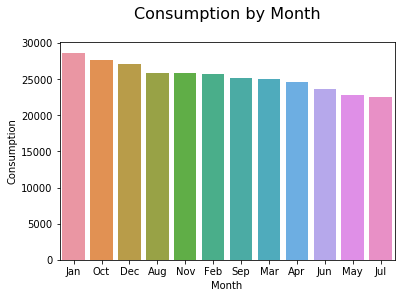

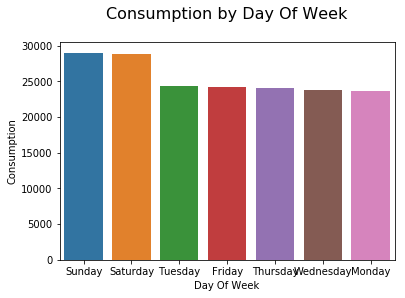

In [29]:
# imports

from functools import reduce
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

def acquire():
    data = pd.read_csv('./input/Consumo_cerveja.csv', decimal=",")
    return data

def wrangle(raw):
    data = raw[:365]
    data = data.rename(columns={'Data':'Day', 'Temperatura Maxima (C)': 'Max Temp', 'Temperatura Minima (C)': 'Min Temp', 'Temperatura Media (C)':'Mid Temp', 'Precipitacao (mm)':'Rainfall', 'Final de Semana':'Weekend', 'Consumo de cerveja (litros)':'Consumption'})
    data['Day Of Week'] = pd.to_datetime(data['Day']).dt.weekday_name
    data['Day'] = data['Day'].apply(lambda s: s.split('-'))
    data[['Year','Month','Day']] = pd.DataFrame(data.Day.values.tolist(), index=data.index)
    column_order = ['Year','Month','Day','Day Of Week','Min Temp','Mid Temp','Max Temp','Rainfall','Weekend','Consumption']
    data = data[column_order]
    data = data.drop(['Year'], axis=1)
    data['Month'] = data['Month'].astype('int')
    data['Consumption'] = data['Consumption'].astype('float64')
    data['Consumption'] = data['Consumption'].apply(lambda x: x*1000)
    data['Month'] = data['Month'].apply(lambda x: calendar.month_abbr[x])

    return data

def analyze(data):
    cons_month = data.groupby('Month', as_index=False).agg({'Mid Temp':'mean','Rainfall':'mean','Consumption':'mean'}).sort_values(by=('Consumption'), ascending=False)
    cons_day = data.groupby('Day Of Week', as_index=False).agg({'Mid Temp':'mean','Rainfall':'mean','Consumption':'mean'}).sort_values(by=('Consumption'), ascending=False)
    return data, cons_month, cons_day
    
def vis_save(data, cons, xvalue='x-axis', yvalue='y-axis'):
    title = yvalue + ' by ' + xvalue
    barchart = sns.barplot(data=cons, x=xvalue, y=yvalue)
    plt.title(title + "\n", fontsize=16)
    fig = barchart.get_figure()
    fig.savefig(title + '.png')
    plt.show()
    

    
data = acquire()
filtered = wrangle(data)
results, cons_month, cons_day = analyze(filtered)

vis_save(results, cons_month, 'Month', 'Consumption')

vis_save(results, cons_day, 'Day Of Week', 'Consumption')

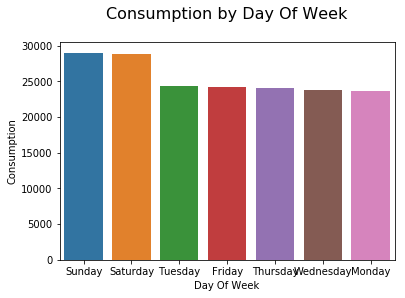